<a href="https://colab.research.google.com/github/Rossel/DataQuest_Courses/blob/master/039__Data_Cleaning_Walkthrough_Combining_the_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE 6/6: DATA CLEANING WALKTHROUGH

# MISSION 2: Data Cleaning Walkthrough: Combining the Data


Learn how to combine multiple data sets to get a single, clean data set.

## 1. Introduction

In the last mission, we began investigating possible relationships between SAT scores and demographic factors. In order to do this, we acquired several data sets about [New York City public schools](https://data.cityofnewyork.us/data?cat=education). We manipulated these data sets, and found that we could combine them all using the `DBN` column. All of the data sets are currently stored as keys in the `data` dictionary. Each individual data set is a pandas dataframe.

In this mission, we'll clean the data a bit more, then combine it. Finally, we'll compute correlations and perform some analysis.

The first thing we'll need to do in preparation for the merge is condense some of the data sets. In the last mission, we noticed that the values in the `DBN` column were unique in the `sat_results` data set. Other data sets like `class_size` had duplicate `DBN` values, however.

We'll need to condense these data sets so that each value in the `DBN` column is unique. If not, we'll run into issues when it comes time to combine the data sets.

While the main data set we want to analyze, `sat_results`, has unique `DBN` values for every high school in New York City, other data sets aren't as clean. A single row in the `sat_results` data set may match multiple rows in the `class_size` data set, for example. This situation will create problems, because we don't know which of the multiple entries in the `class_size` data set we should combine with the single matching entry in `sat_results`. Here's a diagram that illustrates the problem:


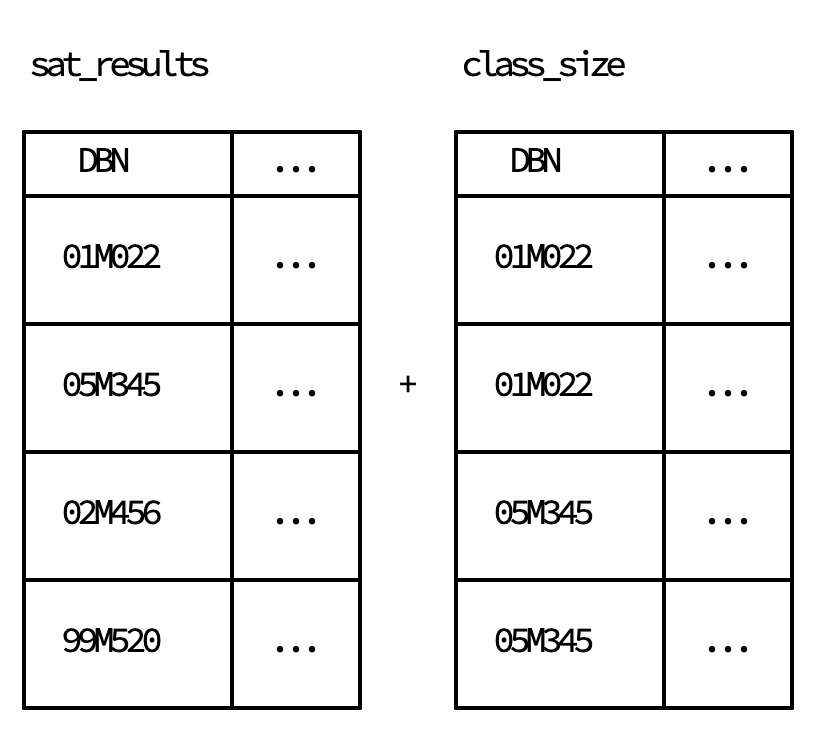

In the diagram above, we can't just combine the rows from both data sets because there are several cases where multiple rows in `class_size` match a single row in `sat_results`.

To resolve this issue, we'll condense the `class_size`, `graduation`, and `demographics` data sets so that each `DBN` is unique.

In [ ]:
# Loading the files
# Download the files from the links below:
# "ap_2010.csv": https://drive.google.com/file/d/1KuI49etwQLsPS67JbVv4JPBcqPAh0bPe/view?usp=sharing
# 'class_size.csv': https://drive.google.com/file/d/1KuI49etwQLsPS67JbVv4JPBcqPAh0bPe/view?usp=sharing
# 'demographics.csv': https://drive.google.com/file/d/1gsKvOdzOBl2gllcOycsTRIv6n5q_uyjU/view?usp=sharing
# 'graduation.csv': https://drive.google.com/file/d/1EA4qZSFxAtnkiA0XeZuhFuIUoRnd844H/view?usp=sharing
# 'hs_directory.csv': https://drive.google.com/file/d/1JkSe5aOrSbBonyeY_1cbv2HQi_K27YnR/view?usp=sharing
# 'sat_results.csv': https://drive.google.com/file/d/1ccb_BgcwfoBveOQQ7iqvRPuDvqP3BQFt/view?usp=sharing
# 'survey_all.txt': https://drive.google.com/file/d/1f1czoKEPHDtyM7u6Kr6FJbNOPZfy4rD6/view?usp=sharing
# 'survey_d75.txt': https://drive.google.com/file/d/1HZMJ3JYHDFZcv6sDSMqP2_CElIU_e5UX/view?usp=sharing


In [ ]:
# Import files directly using Google Colab
from google.colab import files
upload = files.upload()
upload = files.upload()
upload = files.upload()
upload = files.upload()
upload = files.upload()
upload = files.upload()
upload = files.upload()
upload = files.upload()

Saving ap_2010.csv to ap_2010.csv


Saving class_size.csv to class_size.csv


Saving demographics.csv to demographics.csv


Saving graduation.csv to graduation.csv


Saving hs_directory.csv to hs_directory.csv


Saving sat_results.csv to sat_results.csv


Saving survey_all.txt to survey_all.txt


Saving survey_d75.txt to survey_d75.txt


In [ ]:
import pandas as pd
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
data = {}

for f in data_files:
    d = pd.read_csv("{0}".format(f))
    key_name = f.replace(".csv", "")
    data[key_name] = d

## 2. Condensing the Class Size Data Set

The first data set that we'll condense is class_size. The first few rows of class_size look like this:

In [ ]:
print(data["class_size"].head())

   CSD BOROUGH  ... DATA SOURCE SCHOOLWIDE PUPIL-TEACHER RATIO
0    1       M  ...         ATS                            NaN
1    1       M  ...         ATS                            NaN
2    1       M  ...         ATS                            NaN
3    1       M  ...         ATS                            NaN
4    1       M  ...         ATS                            NaN

[5 rows x 16 columns]


As you can see, the first few rows all pertain to the same school, which is why the `DBN` appears more than once. It looks like each school has multiple values for `GRADE`, `PROGRAM TYPE`, `CORE SUBJECT (MS CORE and 9-12 ONLY)`, and `CORE COURSE (MS CORE and 9-12 ONLY)`.

If we look at the unique values for `GRADE`, we get the following:

```
array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)
```


Because we're dealing with high schools, we're only concerned with grades `9` through `12`. That means we only want to pick rows where the value in the `GRADE` column is `09-12`.

If we look at the unique values for `PROGRAM TYPE`, we get the following:

```
array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)
```

Each school can have multiple program types. Because `GEN ED` is the largest category by far, let's only select rows where `PROGRAM TYPE` is `GEN ED`.

## 3. Condensing the Class Size Data Set

**Instructions:**

- Create a new variable called `class_size`, and assign the value of `data["class_size"]` to it.
- Filter `class_size` so the `GRADE`  column only contains the value `09-12`. Note that the name of the `GRADE`  column has a space at the end; you'll generate an error if you don't include it.
- Filter `class_size` so that the `PROGRAM TYPE` column only contains the value `GEN ED`.
- Display the first five rows of `class_size` to verify.


In [ ]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
v

     CSD BOROUGH  ... DATA SOURCE SCHOOLWIDE PUPIL-TEACHER RATIO
225    1       M  ...       STARS                            NaN
226    1       M  ...       STARS                            NaN
227    1       M  ...       STARS                            NaN
228    1       M  ...       STARS                            NaN
229    1       M  ...       STARS                            NaN

[5 rows x 16 columns]


## 4. Computing Average Class Sizes

As we saw when we displayed `class_size` on the last screen, `DBN` still isn't completely unique. This is due to the `CORE COURSE (MS CORE and 9-12 ONLY)` and `CORE SUBJECT (MS CORE and 9-12 ONLY)` columns.

`CORE COURSE (MS CORE and 9-12 ONLY)` and `CORE SUBJECT (MS CORE and 9-12 ONLY)` seem to pertain to different kinds of classes. For example, here are the unique values for `CORE SUBJECT (MS CORE and 9-12 ONLY)`:
```
array(['ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'], dtype=object)
```
This column only seems to include certain subjects. We want our class size data to include every single class a school offers -- not just a subset of them. What we can do is take the average across all of the classes a school offers. This will give us unique `DBN` values, while also incorporating as much data as possible into the average.

Fortunately, we can use the pandas.[DataFrame.groupby()](http://pandas.pydata.org/pandas-docs/stable/groupby.html) method to help us with this. The `DataFrame.groupby()` method will split a dataframe up into unique groups, based on a given column. We can then use the [agg()](http://pandas.pydata.org/pandas-docs/stable/groupby.html#aggregation) method on the resulting `pandas.core.groupby` object to find the mean of each column.

Let's say we have this data set:

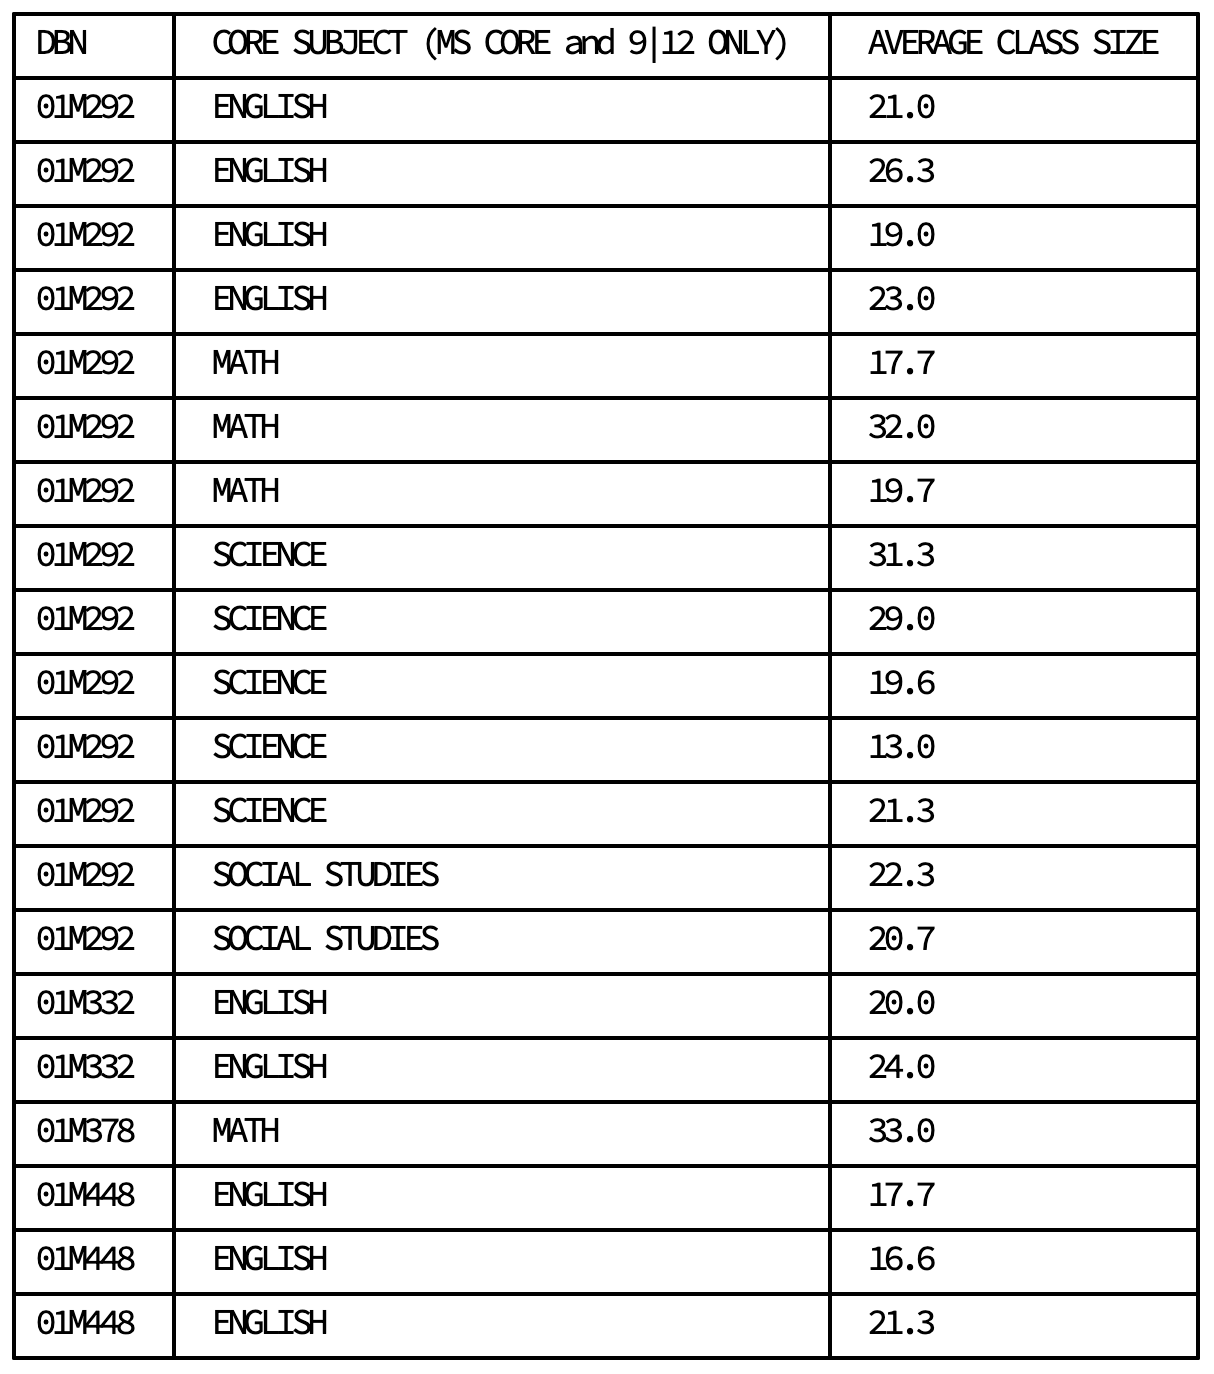

Using the `groupby()` method, we'll split this dataframe into four separate groups -- one with the `DBN 01M292`, one with the `DBN 01M332`, one with the `DBN 01M378`, and one with the `DBN 01M448`:

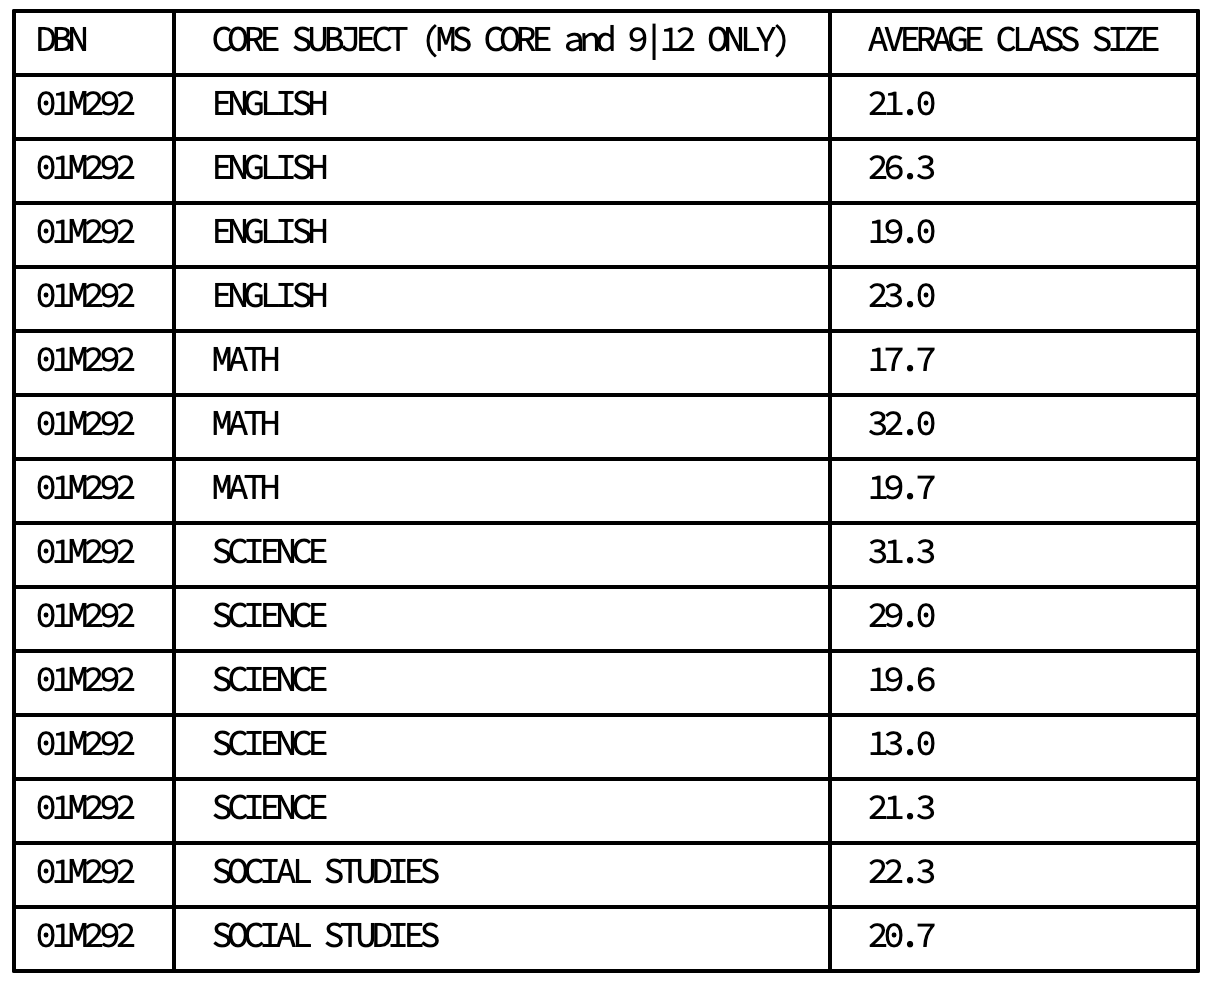

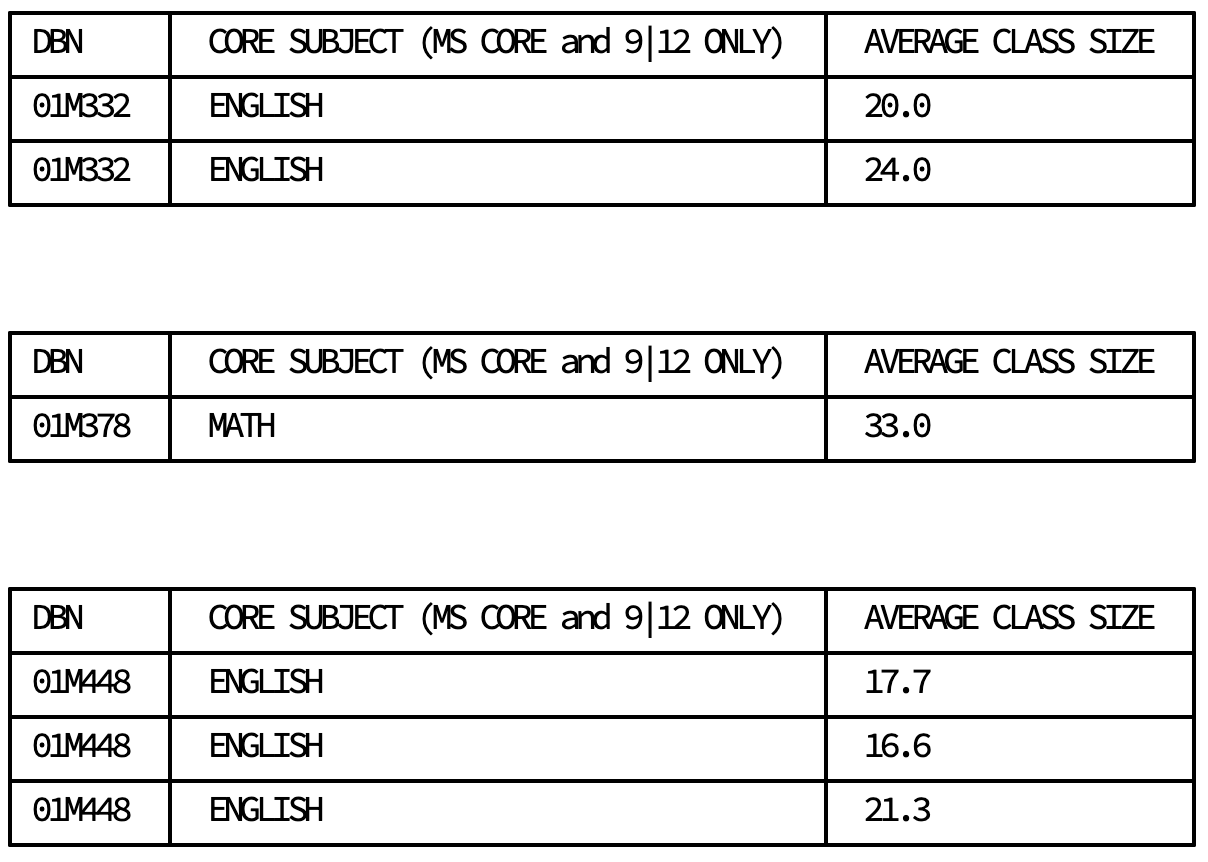

Then, we can compute the averages for the `AVERAGE CLASS SIZE` column in each of the four groups using the `agg()` method:

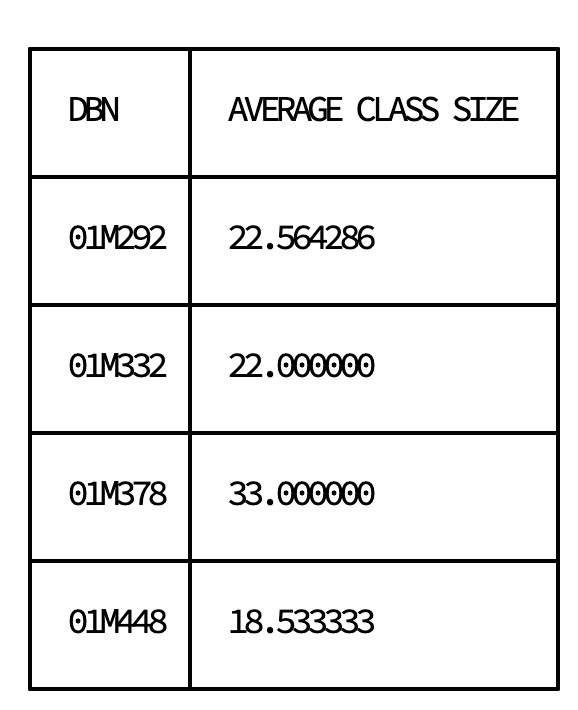

After we group a dataframe and aggregate data based on it, the column we performed the grouping on (in this case `DBN`) will become the index, and will no longer appear as a column in the data itself. To undo this change and keep `DBN` as a column, we'll need to use [pandas.DataFrame.reset_index()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html). This method will reset the index to a list of integers and make `DBN` a column again.

## 5. Computing Average Class Sizes

**Instructions:**

- Find the average values for each column associated with each `DBN` in `class_size`.
 - Use the [pandas.DataFrame.groupby()](http://pandas.pydata.org/pandas-docs/stable/groupby.html) method to group `class_size` by `DBN`.
 - Use the [agg()](http://pandas.pydata.org/pandas-docs/stable/groupby.html#aggregation) method on the resulting `pandas.core.groupby` object, along with the `numpy.mean()` function as an argument, to calculate the average of each group.
 - Assign the result back to `class_size`.
- Reset the index to make `DBN` a column again.
 - Use the [pandas.DataFrame.reset_index()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html) method, along with the keyword argument `inplace=True`.
- Assign `class_size` back to the `class_size` key of the `data` dictionary.
- Display the first few rows of `data["class_size"]` to verify that everything went okay.


In [ ]:
# Solution

class_size = class_size.groupby("DBN").agg(numpy.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size
print(data["class_size"].head())

## 6. Condensing the Demographics Data Set

Now that we've finished condensing `class_size`, let's condense `demographics`. The first few rows look like this:

In [ ]:
print(demographics.head())

In this case, the only column that prevents a given `DBN` from being unique is `schoolyear`. We only want to select rows where `schoolyear` is `20112012`. This will give us the most recent year of data, and also match our SAT results data.

## 7. Condensing the Demographics Data Set

**Instructions:**

- Filter `demographics`, only selecting rows in `data["demographics"] where `schoolyear` is `20112012`.
 - `schoolyear` is actually an integer, so be careful about how you perform your comparison.
- Display the first few rows of `data["demographics"]` to verify that the filtering worked.


In [ ]:
# Solution

data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]
print(data["demographics"].head())

## 8. Condensing the Graduation Data Set

Finally, we'll need to condense the `graduation` data set. Here are the first few rows:

In [ ]:
print(graduation.head())

The `Demographic` and `Cohort` columns are what prevent `DBN` from being unique in the `graduation` data. A `Cohort` appears to refer to the year the data represents, and the `Demographic` appears to refer to a specific demographic group. In this case, we want to pick data from the most recent `Cohort` available, which is `2006`. We also want data from the full cohort, so we'll only pick rows where `Demographic` is `Total Cohort`.

## 9. Condensing the Graduation Data Set

**Instructions:**

- Filter `graduation`, only selecting rows where the `Cohort` column equals `2006`.
- Filter `graduation`, only selecting rows where the `Demographic` column equals `Total Cohort`.
- Display the first few rows of `data["graduation"]` to verify that everything worked properly.


In [ ]:
# Solution

data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]
print(data["graduation"].head())

## 10. Converting AP Test Scores

We're almost ready to combine all of the data sets. The only remaining thing to do is convert the [Advanced Placement](https://en.wikipedia.org/wiki/Advanced_Placement_exams) (AP) test scores from strings to numeric values. High school students take the AP exams before applying to college. There are several AP exams, each corresponding to a school subject. High school students who earn high scores may receive college credit.

AP exams have a `1` to `5` scale; `3` or higher is a passing score. Many high school students take AP exams -- particularly those who attend academically challenging institutions. AP exams are much more rare in schools that lack funding or academic rigor.

It will be interesting to find out whether AP exam scores are correlated with SAT scores across high schools. To determine this, we'll need to convert the AP exam scores in the `ap_2010` data set to numeric values first.

There are three columns we'll need to convert:

- `AP Test Takers` (note that there's a trailing space in the column name)
- `Total Exams Taken`
- `Number of Exams with scores 3 4 or 5`


**Instructions:**

- Convert each of the following columns in `ap_2010` to numeric values using the [pandas.to_numeric()](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.to_numeric.html) function with the keyword argument `errors="coerce"`.
 - `AP Test Takers`
 - `Total Exams Taken`
 - `Number of Exams with scores 3 4 or 5`
- Display the column types using the `dtypes` attribute.


In [ ]:
# Provided code
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

In [ ]:
# Solution

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")
    
print(data["ap_2010"].dtypes)

## 11. Left, Right, Inner, and Outer Joins

Before we merge our data, we'll need to decide on the merge strategy we want to use. We'll be using the pandas [pandas.DataFrame.merge()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) function, which supports four types of joins -- `left`, `right`, `inner`, and `outer`. Each of these join types dictates how pandas combines the rows.

We'll be using the `DBN` column to identify matching rows across data sets. In other words, the values in that column will help us know which row from the first data set to combine with which row in the second data set.

There may be `DBN` values that exist in one data set but not in another. This is partly because the data is from different years. Each data set also has inconsistencies in terms of how it was gathered. Human error (and other types of errors) may also play a role. Therefore, we may not find matches for the `DBN` values in `sat_results` in all of the other data sets, and other data sets may have `DBN` values that don't exist in `sat_results`.

We'll merge two data sets at a time. For example, we'll merge `sat_results` and `hs_directory`, then merge the result with `ap_2010`, then merge the result of that with `class_size`. We'll continue combining data sets in this way until we've merged all of them. Afterwards, we'll have roughly the same number of rows, but each row will have columns from all of the data sets.

The merge strategy we pick will affect the number of rows we end up with. Let's take a look at each strategy.

Let's say we're merging the following two data sets:

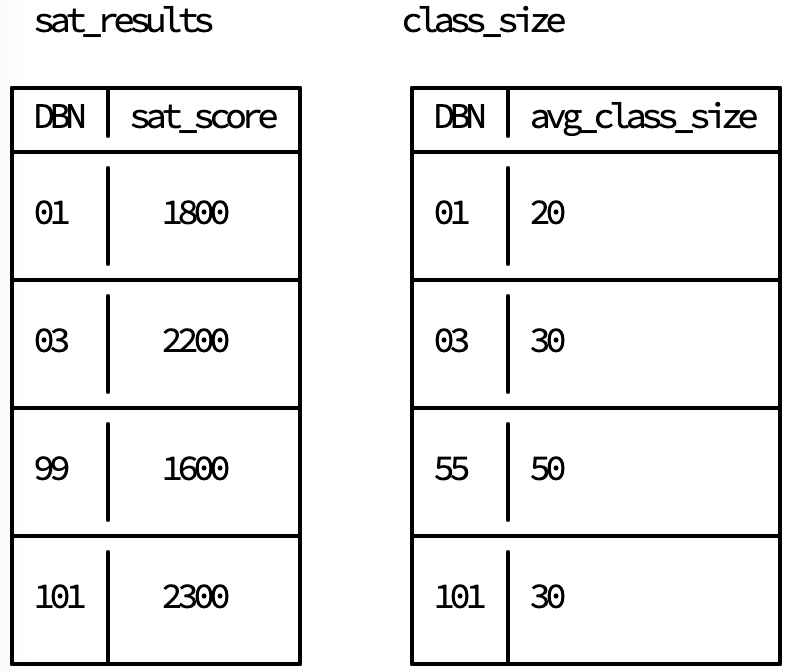

With an `inner` merge, we'd only combine rows where the same `DBN` exists in both data sets. We'd end up with this result:

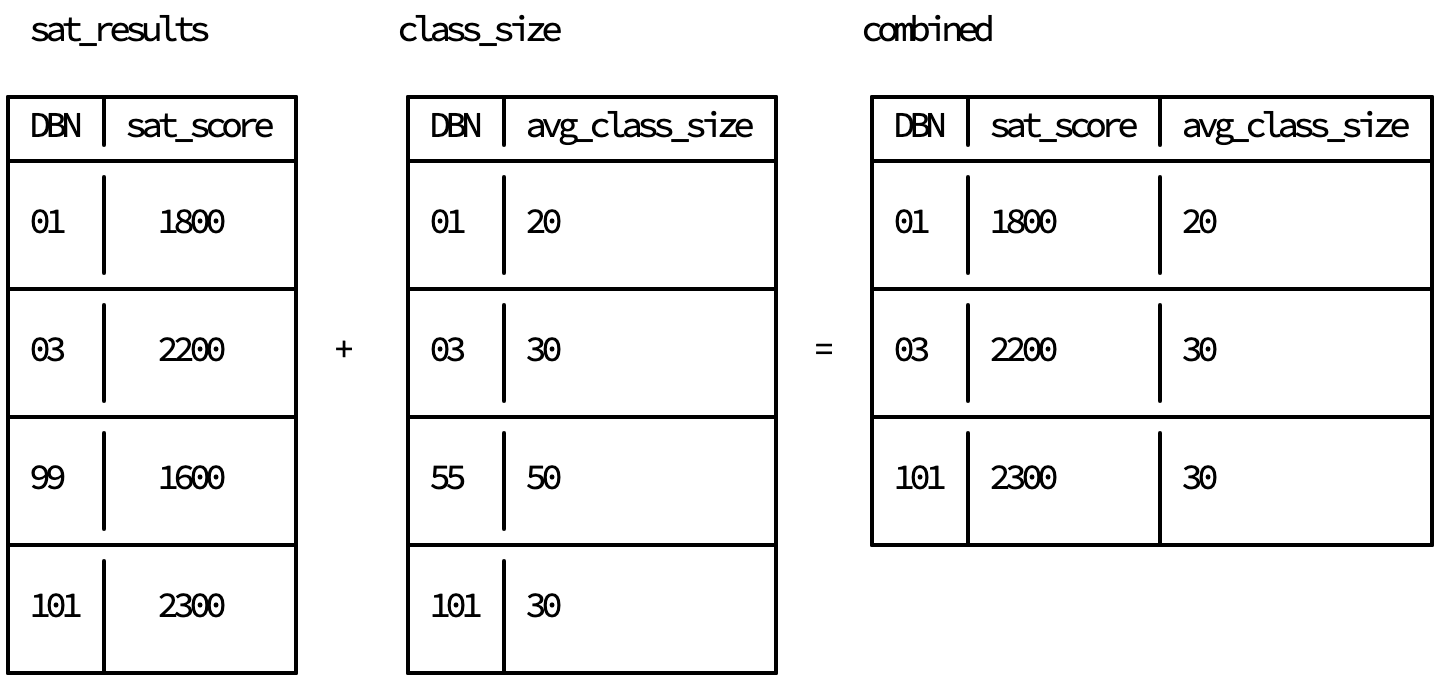

With a `left` merge, we'd only use `DBN` values from the dataframe on the "left" of the merge. In this case, `sat_results` is on the left. Some of the DBNs in `sat_results` don't exist in `class_size`, though. The merge will handle this by assiging null values to the columns in `sat_results` that don't have corresponding data in `class_size`.

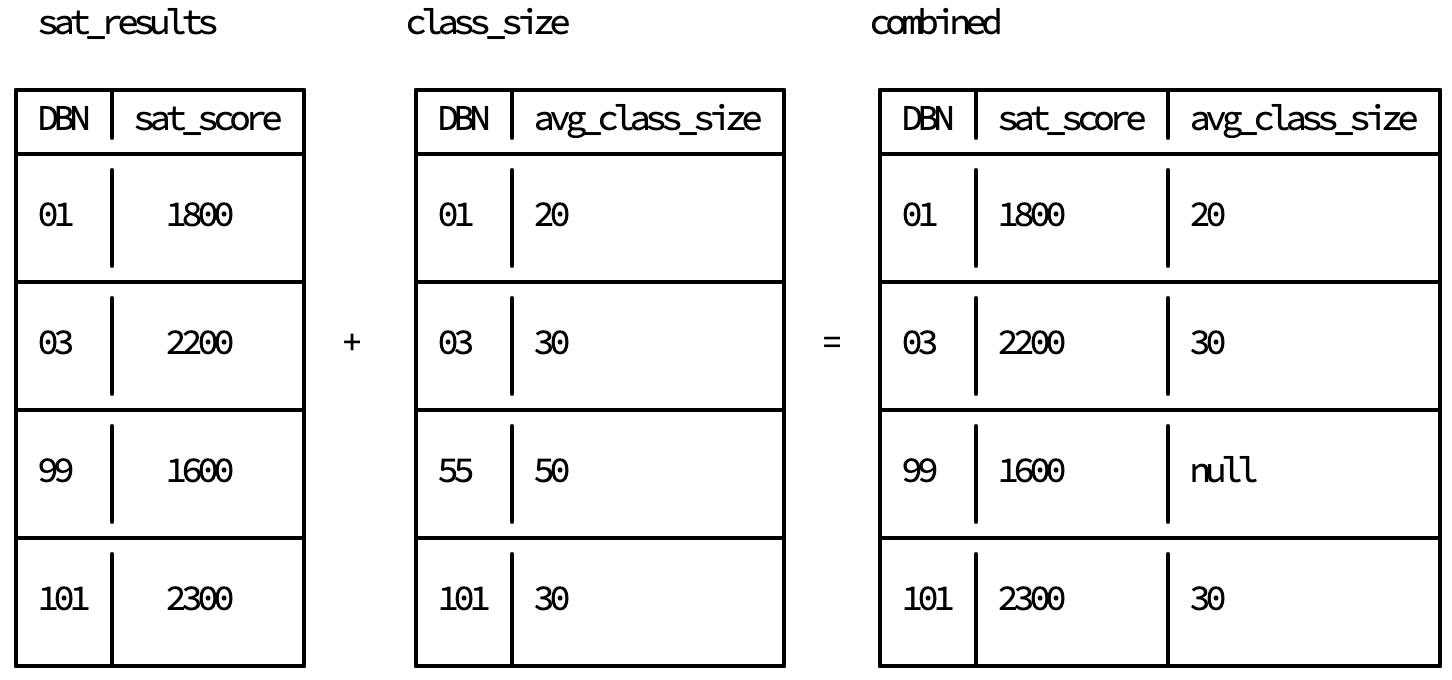

With a `right` merge, we'll only use `DBN` values from the dataframe on the "right" of the merge. In this case, `class_size` is on the right:

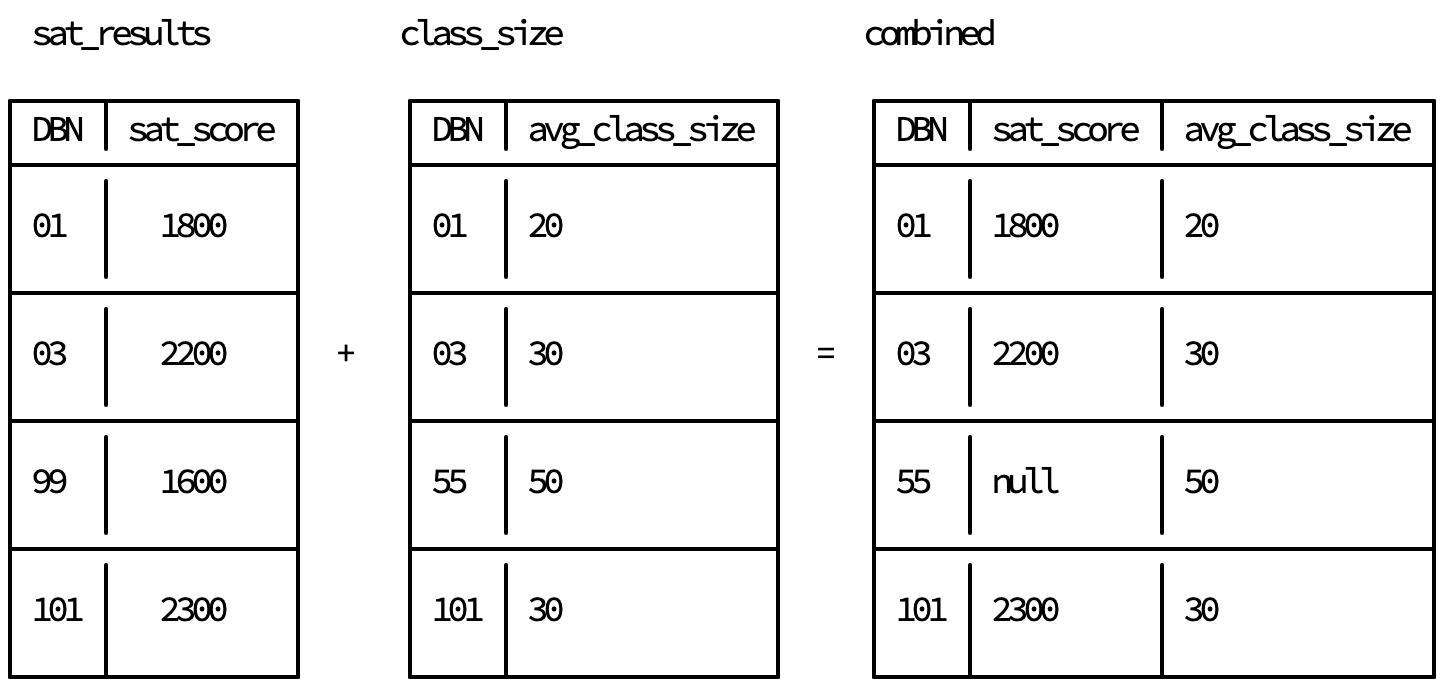

With an `outer` merge, we'll take any `DBN` values from either `sat_results` or `class_size`:

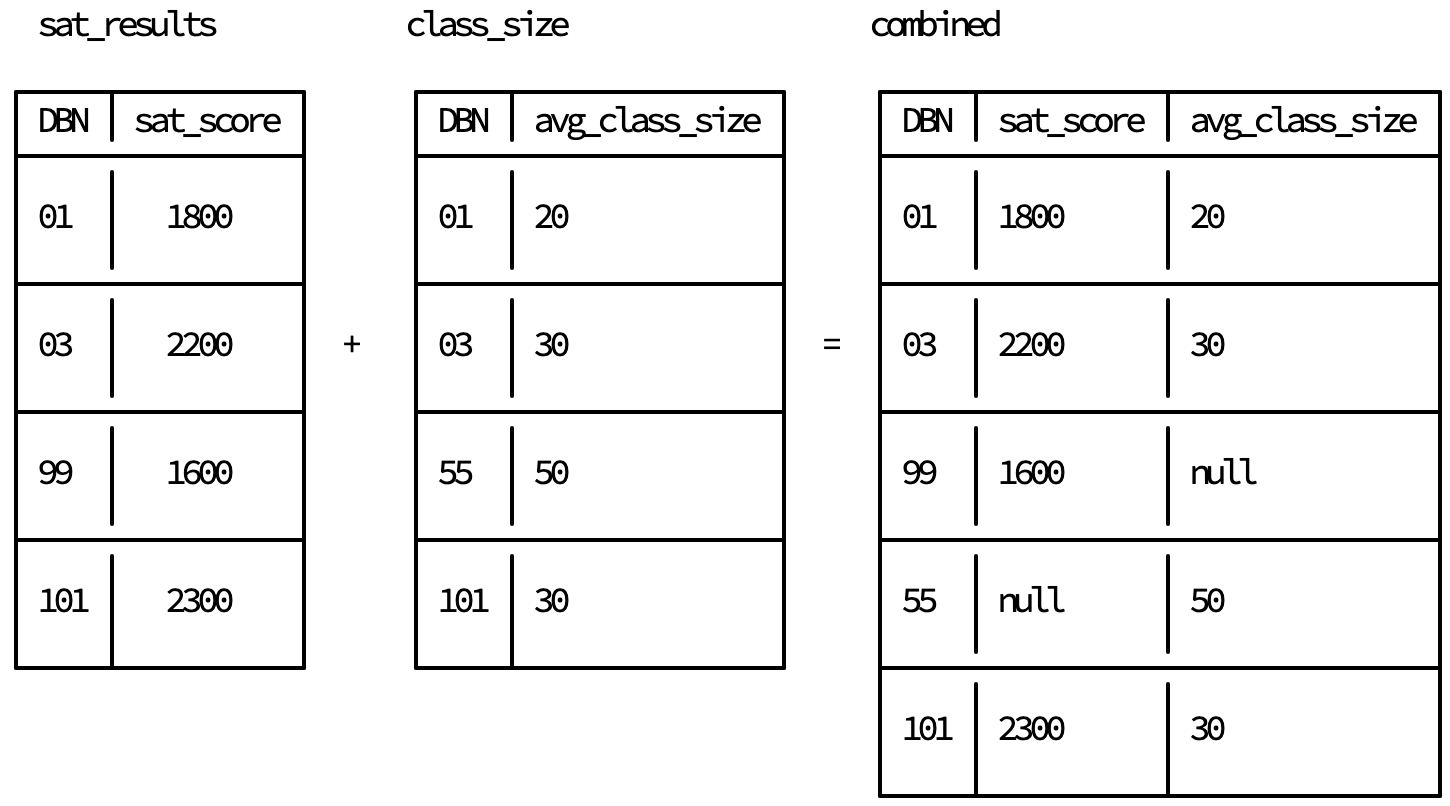

As you can see, each merge strategy has its advantages. Depending on the strategy we choose, we may preserve rows at the expense of having more missing column data, or minimize missing data at the expense of having fewer rows. Choosing a merge strategy is an important decision; it's worth thinking about your data carefully, and what trade-offs you're willing to make.

Because this project is concerned with determing demographic factors that correlate with SAT score, we'll want to preserve as many rows as possible from `sat_results` while minimizing null values.

This means that we may need to use different merge strategies with different data sets. Some of the data sets have a lot of missing `DBN` values. This makes a `left` join more appropriate, because we don't want to lose too many rows when we merge. If we did an `inner` join, we would lose the data for many high schools.

Some data sets have `DBN` values that are almost identical to those in `sat_results`. Those data sets also have information we need to keep. Most of our analysis would be impossible if a significant number of rows was missing from `demographics`, for example. Therefore, we'll do an inner join to avoid missing data in these columns.

## 12. Performing the Left Joins

Both the `ap_2010` and the `graduation` data sets have many missing `DBN` values, so we'll use a `left` join when we merge the `sat_results` data set with them. Because we're using a `left` join, our final dataframe will have all of the same DBN values as the original `sat_results` dataframe.

We'll need to use the pandas `df.merge()` method to merge dataframes. The "left" dataframe is the one we call the method on, and the "right" dataframe is the one we pass into `df.merge()`.

Because we're using the `DBN` column to join the dataframes, we'll need to specify the keyword argument `on="DBN"` when calling `pandas.DataFrame.merge()`.

First, we'll assign `data["sat_results"]` to the variable `combined`. Then, we'll merge all of the other dataframes with `combined`. When we're finished, `combined` will have all of the columns from all of the data sets.



**Instructions:**

- Use the pandas [pandas.DataFrame.merge()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) method to merge the `ap_2010` data set into `combined`.
 - Make sure to specify `how="left"` as a keyword argument to indicate the correct join type.
 - Make sure to assign the result of the merge operation back to `combined`.
- Use the pandas `df.merge()` method to merge the `graduation` data set into `combined`.
 - Make sure to specify `how="left"` as a keyword argument to get the correct join type.
 - Make sure to assign the result of the merge operation back to `combined`.
- Display the first few rows of `combined` to verify that the correct operations occurred.
- Use the [pandas.DataFrame.shape](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.shape.html) attribute to display the shape of the dataframe and see how many rows now exist.

In [ ]:
# Solution

combined = data["sat_results"]

combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")
print(combined.head(5))
print(combined.shape)

## 13. Performing the Inner Joins

Now that we've performed the `left` joins, we still have to merge `class_size`, `demographics`, `survey`, and `hs_directory` into `combined`. Because these files contain information that's more valuable to our analysis and also have fewer missing `DBN` values, we'll use the `inner` join type.

**Instructions:**

- Merge `class_size` into `combined`. Then, merge `demographics`, `survey`, and `hs_directory` into `combined` one by one, in that order.
 - Be sure to follow the exact order above.
 - Remember to specify the correct column to join on, as well as the correct join type.
- Display the first few rows of `combined` to verify that the correct operations occurred.
- Use the `pandas.DataFrame.shape` attribute to display the shape of the dataframe to see how many rows now exist.

## 14. Filling in Missing Values

You may have noticed that the inner joins resulted in `116` fewer rows in `sat_results`. This is because pandas couldn't find the `DBN` values that existed in `sat_results` in the other data sets. While this is worth investigating, we're currently looking for high-level correlations, so we don't need to dive into which `DBNs` are missing.

You may also have noticed that we now have many columns with null (`NaN`) values. This is because we chose to do `left` joins, where some columns may not have had data. The data set also had some missing values to begin with. If we hadn't performed a `left` join, all of the rows with missing data would have been lost in the merge process, which wouldn't have left us with many high schools in our data set.

There are several ways to handle missing data, and we'll cover them in more detail later on. For now, we'll just fill in the missing values with the overall mean for the column, like so:

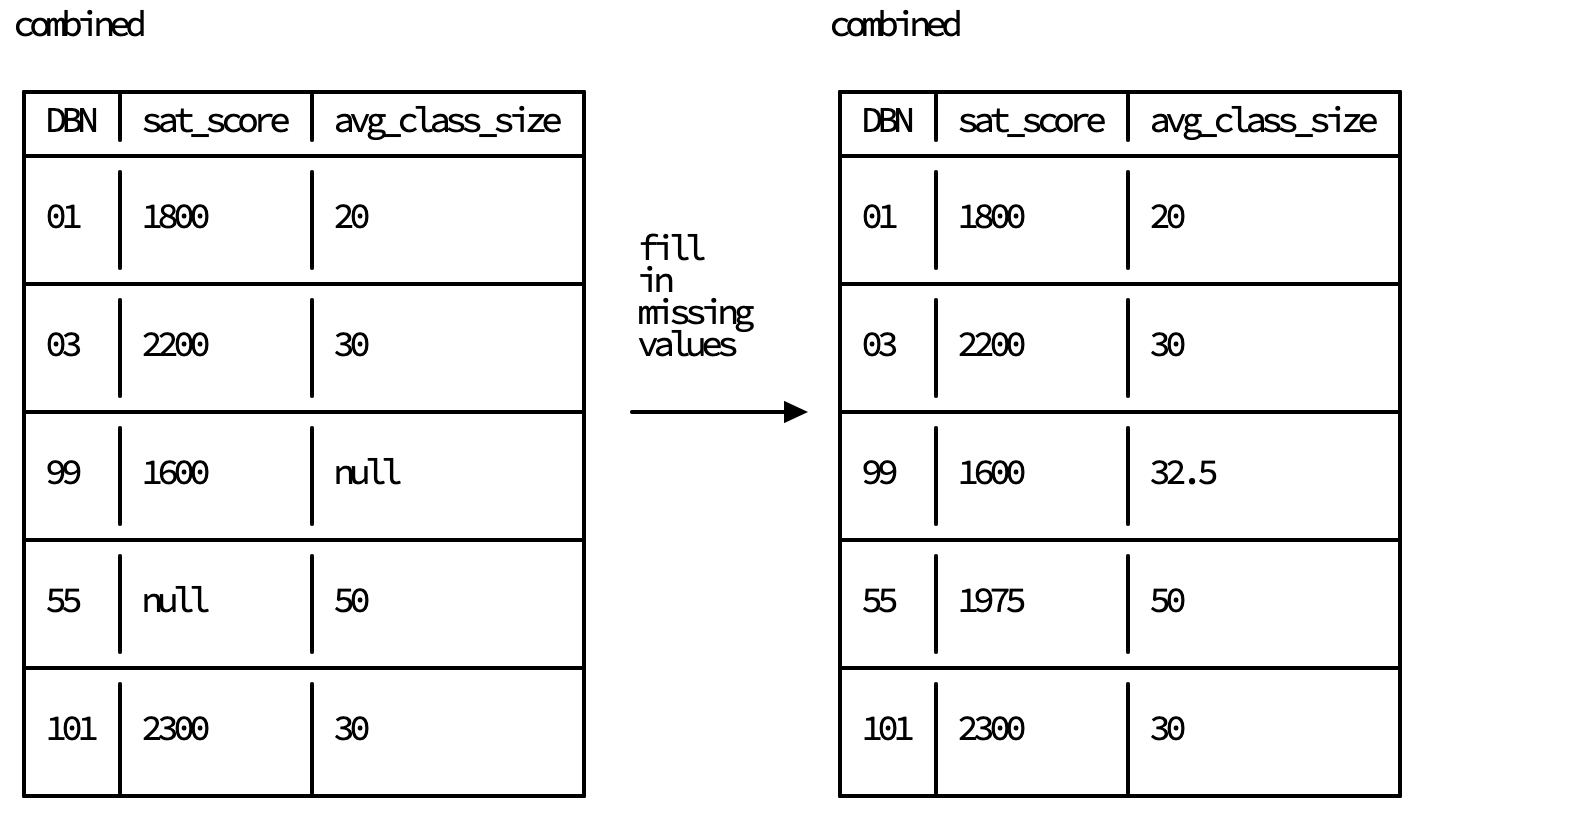

In the diagram above, the mean of the first column is `(1800 + 1600 + 2200 + 2300) / 4`, or `1975`, and the mean of the second column is `(20 + 30 + 30 + 50) / 4`, or `32.5`. We replace the missing values with the means of their respective columns, which allows us to proceed with analyses that can't handle missing values (like correlations).

We can fill in missing data in pandas using the [pandas.DataFrame.fillna()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html) method. This method will replace any missing values in a dataframe with the values we specify. We can compute the mean of every column using the [pandas.DataFrame.mean()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) method. If we pass the results of the `df.mean()` method into the `df.fillna()` method, pandas will fill in the missing values in each column with the mean of that column.

Here's an example of how we would accomplish this:
```
means = df.mean()
df = df.fillna(means)
```
Note that if a column consists entirely of null or `NaN` values, pandas won't be able to fill in the missing values when we use the `df.fillna()` method along with the `df.mean()` method, because there won't be a mean.

We should fill any `NaN` or null values that remain after the initial replacement with the value `0`. We can do this by passing `0` into the `df.fillna()` method.

## 15. Filling in Missing Values

**Instructions:**

- Calculate the means of all of the columns in `combined` using the pandas.[DataFrame.mean()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) method.
- Fill in any missing values in `combined` with the means of the respective columns using the [pandas.DataFrame.fillna()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html) method.
- Fill in any remaining missing values in `combined` with `0` using the `df.fillna()` method.
- Display the first few rows of `combined` to verify that the correct operations occurred.

## 16. Adding a School District Column for Mapping

We've finished cleaning and combining our data! We now have a clean data set on which we can base our analysis. Mapping the statistics out on a school district level might be an interesting way to analyze them. Adding a column to the data set that specifies the school district will help us accomplish this.

The school district is just the first two characters of the `DBN`. We can apply a function over the `DBN` column of `combined` that pulls out the first two letters.

For example, we can use indexing to extract the first few characters of a string, like this:
```
name = "Sinbad"
print(name[0:2])
```

**Instructions:**

- Write a function that extracts the first two characters of a string and returns them.
- Apply the function to the `DBN` column of `combined`, and assign the result to the `school_dist` column of `combined`.
- Display the first few items in the `school_dist` column of `combined` to verify the results.

---

We now have a clean data set we can analyze! We've done a lot in this mission. We've gone from having several messy sources to one clean, combined, data set that's ready for analysis.

Along the way, we've learned about:

- How to handle missing values
- Different types of merges
- How to condense data sets
- How to compute averages across dataframes

Data scientists rarely start out with tidy data sets, which makes cleaning and combining them one of the most critical skills any data professional can learn.

In the next mission, we'll analyze our clean data to find correlations and create maps.